# Gradient methods

Gradient methods are a class of optimization algorithms used to minimize or maximize a function. They are widely used in various fields such as machine learning, statistics, engineering, and economics.

At its core, gradient methods rely on the concept of gradients, which are vectors that point in the direction of the steepest increase of a function. In optimization, the gradient points in the direction of the steepest increase of the objective function. Therefore, to minimize the function, we move in the opposite direction of the gradient.

![Visualization](Gradient_Descent.png)

There are various gradient methods, each with its own specific way of updating the solution, but today we will simply focus on the following three methods:

* Gradient Descent: It is the most basic gradient method where the solution is updated by taking steps proportional to the negative of the gradient.

* Stochastic Gradient Descent (SGD): In this method, instead of computing the gradient using the entire dataset, the gradient is estimated using a subset of the data (a mini-batch). It's particularly useful when dealing with large datasets.

* Conjugate Gradient: This method is designed to solve systems of linear equations or to minimize unconstrained quadratic functions.

The approach for the first two will be through a very known problem: Linear Regression, but this time viewed more like an optimization problem.

Before starting, we should install all the new requirements for the lab:

In [219]:
# Uncomment the following line if you do not already have the pandas module installed
# If "pip" is not working, use "pip3" instead

# %pip install pandas

And also import everything we need:

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We are going to work with quite a big dataset to make some predictions regarding the price of a house according to the given features. First we need to extract these features from the dataset(only the numerical ones).

In [221]:
# TODO: Load the dataset
# Hint: pd.read_csv()
data_set = None

numerical_attributes_list = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                            'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
                            'yr_built', 'lat', 'long', 'floors', 'yr_renovated']

Now we can extract the main features we're gonna use and initialize the parameters of the model responsible for prediction.

In [222]:
# Initialization for matrix A
from copy import deepcopy


A = np.zeros((len(data_set), len(numerical_attributes_list) + 1))

# TODO: Fill in the matrix A with the numerical attributes from the list above and a column of ones for the bias term.
# Hint: with "pandas", you can access the values of a column by using the column name as an attribute of the dataframe

m = A.shape[1]

# Initialization for model parameters
X = np.random.normal(size=(m,))
X_stochastic = deepcopy(X)

After reading the data, we will need to implement the algorithms, but the problem is that we cannot actually do that yet, due to the fact that some of the features(including the price) have large values which could result in overflow. That's why we should rescale the features' matrix characteristics.

In [223]:
def normalize_matrix(A):
    # TODO: Compute the mean for each column in the input matrix A
    mean_A = np.zeros(A.shape[0])

    # TODO: Compute the standard deviation for each column in the input matrix A
    std_A = np.zeros(A.shape[0])

    # Avoid division by zero by adding 1 if the standard deviation is zero
    std_A_copy = np.copy(std_A)
    std_A_copy[std_A == 0] = 1

    normalized_A = np.zeros(A.shape)

    # TODO: Normalize the input matrix A
    normalized_A = np.zeros(A.shape)

    return normalized_A

* Gradient Descent Method

We remember the Linear Regression we used in the first labs to find a model that bestly "fits" some given points(computing the pseudoinverse of the input data). We will do the same now, but this time treating the situation as an optimization problem.
This time we wish to find the parameters of the model that predict the best values for our labels, i.e. the line that minimizes the distance between itself and the already known labels. For doing this we will need the mean squared error(which will also represent the objective function of our minimization problem).

$$ \text{MSE}: J(\mathbf{X}) = \frac{1}{N} \sum_{i=1}^{N} (e_i - A_i \mathbf{X_i})^2 $$

The gradient descent algorithm minimizes the given objective function in an interative manner.

These are the algorithm's steps:
1. ${\bf X_0}$ = ${\bf X}$
2. $iters$ = 0
3. **while** $iters$ < max\_iters:
4. &nbsp;&nbsp;&nbsp;&nbsp; ${\bf X}_{iters+1} \leftarrow {\bf X}_{iters} - \alpha \nabla_{\bf X} J({\bf X})$
5. &nbsp;&nbsp;&nbsp;&nbsp; $iters \leftarrow iters+1 $

Here, "alpha" denotes the learning rate we use to update the value of "X" until a final solution is reached. To stop the algorithm we can consider finishing when the norm of the gradient is smaller than a given tolerance(this way we can guarantee that we are very close to the optimal solution).

The gradient of the objective function can be easily computed:
$$\nabla_{\mathbf{X}} J(\mathbf{X}) = -\frac{2}{N} \sum_{i=1}^{N} (\mathbf{A}_i^T (\mathbf{e}_i - \mathbf{A}_i \mathbf{X}_i))$$

Which is equivalent in an easier way to write with:
$$\nabla_{\mathbf{X}} J(\mathbf{X}) = -\frac{2}{N} \mathbf{A}^T (\mathbf{e} - \mathbf{A} \mathbf{X})$$

In [224]:
def gradient_descent(A, e, X, alpha = 0.1, max_iters = 1000, tol = 0.1):
    iters = 0
    N = A.shape[0]

    while iters < max_iters:
        iters += 1

        # TODO: Compute the predicted output
        Y = np.zeros(X.shape)

        # TODO: Compute the error(i.e. the difference between the predicted output and the true output)
        error = np.zeros(e.shape)

        # TODO: Compute the gradient of the loss function with respect to the model parameters
        grad_X = np.zeros(X.shape)

        # TODO: Update the model parameters
        X = np.zeros(X.shape)

        if np.linalg.norm(grad_X) <= tol:
            break

    return X, iters

Now, before applying the algorithm, we should split the dataset for training and testing(don't forget to also rescale each term).

In [225]:
def split_data(data_set, label, A, train_percent):
    indices = range(len(A))
    train_size = int(len(A) * train_percent)
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]

    # TODO: Extract and normalize the train and test data.
    A_train = None
    y_train = None
    A_test = None
    y_test = None
    
    return A_train, y_train, A_test, y_test, train_indices, test_indices

In [226]:
A_train, y_train, A_test, y_test, train_indices, test_indices = split_data(data_set, 'price', A, 0.8)

N = len(A_train)

In [227]:
X_new, iters = gradient_descent(A_train, y_train, X, tol = 1e-3)

print('Iterations:', iters)
print('Model parameters:\n', X_new)

Iterations: 142
Model parameters:
 [-0.13056378  0.12094908  0.24241626  0.0225572   0.33720308  0.13595064
  0.20245972 -0.03681616 -0.19831246  0.2118578  -0.08252923  0.00740511
  0.03644471 -0.01794166]


In [228]:
def denormalize(predictions, mean, std):
    return predictions * std + mean

In [229]:
# The predictions using the model
predictions_test = A_test @ X_new

# MSE computed for the resulted predictions
test_error = np.mean((predictions_test - y_test) ** 2)
print('Mean Squared Error:', test_error)

# Mean and standard deviation of the price in the training set
mean_y_train = np.mean(data_set['price'].values[train_indices])
std_y_train = np.std(data_set['price'].values[train_indices])

# Predictions rescaled to the intial dimensions
denormalized_predictions_test = denormalize(predictions_test, mean_y_train, std_y_train)
print('Predictions:')
print(np.round(denormalized_predictions_test))

sum1 = np.mean((predictions_test - y_test) ** 2)
sum2 = np.mean((y_test - np.mean(y_test)) ** 2)

# R^2 score(coefficient of determination) used to evaluate the performance of out regression model
# The best possible score is 1.0, the worst possible is 0.0.
score = 1 - sum1 / sum2
print(f'R^2 score: {score}')

Mean Squared Error: 0.3893645568949521
Predictions:
[652438. 652438. 245785. ... 134487. 284305. 136951.]
R^2 score: 0.6106354431050479


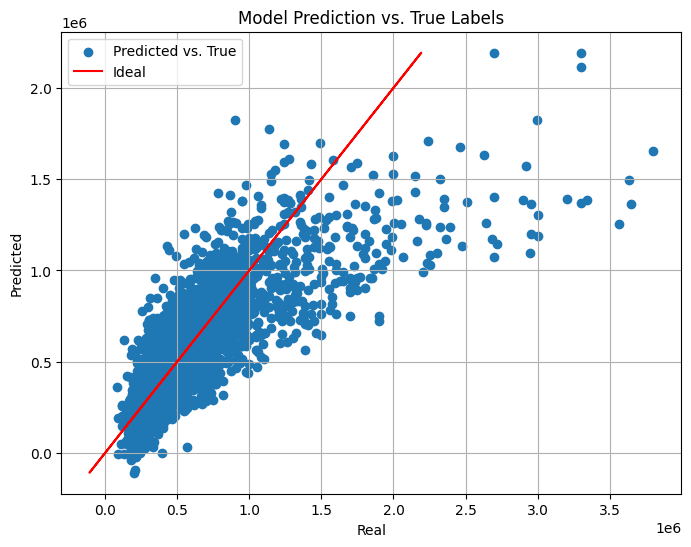

In [230]:
plt.figure(figsize=(8, 6))
plt.scatter(data_set['price'].values[test_indices], denormalized_predictions_test, label='Predicted vs. True')
plt.plot(denormalized_predictions_test, denormalized_predictions_test, color='red', label='Ideal')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.title('Model Prediction vs. True Labels')
plt.legend()
plt.grid(True)
plt.show()

* Stochastic Gradient Descent

It operates the same way as the Gradient Descent algorithm, but it uses only one randomly chosen data point at one time (or a small batch of data points) from the training dataset.

In [231]:
def stochastic_gradient_descent(A, e, X, alpha=0.1, max_iters=1000, tol=0.1):
    iters = 0
    N = A.shape[0]

    while iters < max_iters:
        iters += 1
        grad_X = np.zeros_like(X)

        # TODO: Get a random permutation of the features matrix's indices
        indices = None

        # Here we traverse the data points in a random order
        for i in indices:
            # TODO: select the column corresponding to the current index from the features matrix
            xi = None

            # TODO: select the corresponding element from the label vector "e"
            yi = None

            # TODO: The exact same step as above in the normal(batch) gradient descent
            Y = None
            error = None
            # TODO: Be careful to not divide by the number of samples "N" in here, because we want
            # to compute a mean.
            grad_X += None

        grad_X /= N

        # TODO: Update the model parameters
        X = None

        if np.linalg.norm(grad_X) <= tol:
            break

    return X, iters

In [232]:
X_new, iters = stochastic_gradient_descent(A_train, y_train, X_stochastic, alpha = 0.2, tol = 1e-3)

print('Iterations:', iters)
print('Model parameters:\n', X_new)

# Wait for it. It takes a few seconds to work.

Iterations: 70
Model parameters:
 [-0.1305662   0.12102828  0.24237548  0.02254625  0.33716964  0.13592861
  0.20249371 -0.03680129 -0.19834669  0.21185356 -0.08252498  0.00739732
  0.03643628 -0.01794166]


In [233]:
predictions_test = A_test @ X_new

test_error = np.mean((predictions_test - y_test) ** 2)
print('Mean Squared Error:', test_error)

mean_y_train = np.mean(data_set['price'].values[train_indices])
std_y_train = np.std(data_set['price'].values[train_indices])

denormalized_predictions_test = denormalize(predictions_test, mean_y_train, std_y_train)
print('Predictions:')
print(np.round(denormalized_predictions_test))

sum1 = np.mean((predictions_test - y_test) ** 2)
sum2 = np.mean((y_test - np.mean(y_test)) ** 2)

score = 1 - sum1 / sum2
print(f'R^2 score: {score}')

Mean Squared Error: 0.38936892984963123
Predictions:
[652448. 652448. 245796. ... 134436. 284313. 136900.]
R^2 score: 0.6106310701503688


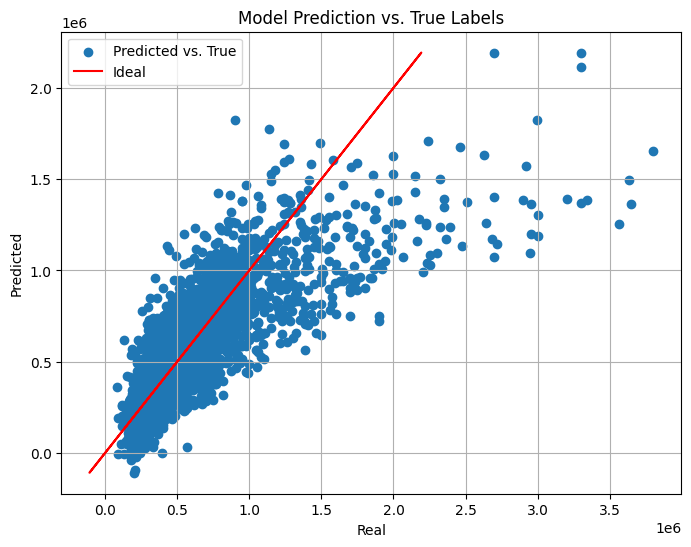

In [234]:
plt.figure(figsize=(8, 6))
plt.scatter(data_set['price'].values[test_indices], denormalized_predictions_test, label='Predicted vs. True')
plt.plot(denormalized_predictions_test, denormalized_predictions_test, color='red', label='Ideal')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.title('Model Prediction vs. True Labels')
plt.legend()
plt.grid(True)
plt.show()

As we can see, both algorithms produce almost identical results, stochastic gradient descent taking "less" iterations to find a solution. The R^2 score is similar to both of them(its value depends much on the features we select for computing the model's parameters and the values these features may take. That's why before making any prediction we must analyze the dataset carefully and eliminate strongly correlated attributes, extreme values which can produce noise, etc...).

* Conjugate Gradient Method

We'll use this last method to compute the argument for whom a quadratic function finds its minimum.

Let the function have the following form:
$$f(x) = \frac{1}{2} x^T Q x - x^T b$$

where $Q$ is a simmetric matrix, $x$ is the vector containing the solution we want to find and $b$ is a vector.

The algorithm is the following:
1. $$iters = size(Q)$$
2. Compute the gradient of the quadratic function:
$$ g(k) = \nabla f(x^{(k)}) = Q x^{(k)} - b$$
3. Compute the conjugate directions:
$$d^{(0)} = -g^{(0)}$$
$$d^{(k)} = -g^{(k)} + \beta_{k-1} d^{(k-1)}$$
where: $$\beta_{k - 1} = -\frac{(g^{(k)})^T Q d^{(k-1)}}{(d^{(k-1)})^T Q d^{(k-1)}}$$
4. Compute the coefficient:
$$\alpha_{k} = -\frac{(g^{(k)})^T d^{(k)}}{(d^{(k)})^T Q d^{(k)}}$$
5. Update the solution:
$$x^{(k+1)} = x^{(k)} + \alpha_{k} d^{(k)}$$
6. $iters = iters - 1$
7. Repeat until $iters$ is 0

In [235]:
def conjugate_gradient(Q, b, x0):
    # Initial step
    iters = Q.shape[0]
    x = x0
    g = Q @ x - b
    d = -g

    # TODO: Implement the above steps.
    while iters > 0:
        # TODO
        iters = iters - 1

    return x

Q = np.array([[3, 0, 1], [0, 4, 2], [1, 2, 3]])
b = np.array([3, 0, 1])
x0 = np.array([0, 0, 0])

x = conjugate_gradient(Q, b, x0)
print('Solution:', x)

Solution: [ 1.00000000e+00 -2.77555756e-17 -1.11022302e-16]
